<a href="https://colab.research.google.com/github/bibekebib/Major-project-raw-files/blob/main/Sagar_Data%2C_Creating_DF_of_videos%2C_plus_learning_to_make_border.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/sagar1'

In [ ]:
from glob import glob
import pandas as pd


In [ ]:
print(glob(dataset_path+'/*'))
all = [x for x in glob(dataset_path+'/*/*.mp4')]

['/content/drive/MyDrive/sagar1/brikshasana', '/content/drive/MyDrive/sagar1/cat_cow', '/content/drive/MyDrive/sagar1/trikonashana']


In [ ]:
label = []
path = []
for i in all:
   label.append(i.split('/')[-2])
   path.append(i)
data = []
data.append(path)
data.append(label)
df = pd.DataFrame(data).transpose()
df.columns=['Path','Label']

In [ ]:
# df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,Path,Label
0,/content/drive/MyDrive/sagar1/brikshasana/2_01...,brikshasana
1,/content/drive/MyDrive/sagar1/brikshasana/2_02...,brikshasana
2,/content/drive/MyDrive/sagar1/brikshasana/2_03...,brikshasana
3,/content/drive/MyDrive/sagar1/brikshasana/2_04...,brikshasana
4,/content/drive/MyDrive/sagar1/brikshasana/2_05...,brikshasana


In [ ]:
df.to_csv('/content/drive/MyDrive/dataset/df_sagar.csv')

In [ ]:
df

,Path,Label
0,/content/drive/MyDrive/sagar1/brikshasana/2_01...,brikshasana
1,/content/drive/MyDrive/sagar1/brikshasana/2_02...,brikshasana
2,/content/drive/MyDrive/sagar1/brikshasana/2_03...,brikshasana
3,/content/drive/MyDrive/sagar1/brikshasana/2_04...,brikshasana
4,/content/drive/MyDrive/sagar1/brikshasana/2_05...,brikshasana
5,/content/drive/MyDrive/sagar1/brikshasana/2_06...,brikshasana
6,/content/drive/MyDrive/sagar1/brikshasana/2_07...,brikshasana
7,/content/drive/MyDrive/sagar1/brikshasana/2_08...,brikshasana
8,/content/drive/MyDrive/sagar1/cat_cow/3_05.mp4,cat_cow
9,/content/drive/MyDrive/sagar1/cat_cow/3_01.mp4,cat_cow


In [ ]:
# df = pd.DataFrame()


In [ ]:
# df = pd.read_csv(dataset_path+'/dataset.csv')

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/dataset/df_sagar.csv')

In [ ]:
# df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.columns

Index(['Path', 'Label'], dtype='object')

In [ ]:
# df.to_csv('sagar_dataframe.csv')

In [ ]:
df.Path[0]

'/content/drive/MyDrive/sagar/brikshasana/2_01.mp4'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


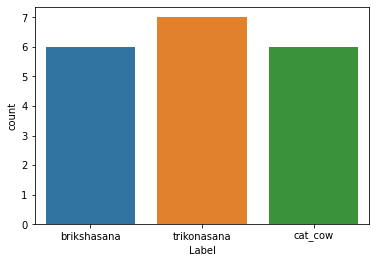

In [ ]:
import seaborn as sns
sns.countplot(df.Label)
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
plt.show()

In [ ]:
#Read frame number 53 of each video:
frame_number=5 #random
import cv2
BLUE = [255,255,255]
def showFrame(path):
    cap = cv2.VideoCapture(path)
    cap.set(1, frame_number)
    res, frame = cap.read()
    print(res)
    print(f'Before conversion to grayscale {frame.shape}')
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    frame= cv2.copyMakeBorder(frame,0,0,53,53,cv2.BORDER_CONSTANT,value=BLUE)
    print(f'afer conversion to grayscale {frame.shape} ')
    plt.title(path.split('/')[-2])
    plt.imshow(frame)
    plt.axis(False)
    plt.show()

True
Before conversion to grayscale (468, 362, 3)
afer conversion to grayscale (468, 468) 


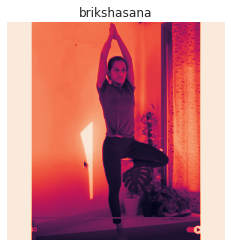

In [ ]:
showFrame(df.Path[0])

In [ ]:
df.Label.unique()

array(['brikshasana', 'trikonasana', 'cat_cow'], dtype=object)

In [ ]:
poses = ['brikshasana', 'trikonasana', 'cat_cow']

In [ ]:
indexs = []
# print(df.loc[df['Label']=='vriksh'])
for i in range(len(poses)):
  indexs.append((df.loc[df['Label']==poses[i]]))

In [ ]:
psycho = []
for i in range(len(indexs)):
  psycho.append((((indexs[i].Path).tolist())[0]))

In [ ]:
psycho

['/content/drive/MyDrive/sagar/brikshasana/2_01.mp4',
 '/content/drive/MyDrive/sagar/trikonasana/1_01.mp4',
 '/content/drive/MyDrive/sagar/cat_cow/3_01.mp4']

True
Before conversion to grayscale (468, 362, 3)
afer conversion to grayscale (468, 468) 


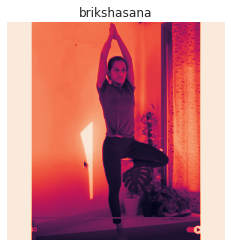

True
Before conversion to grayscale (648, 682, 3)
afer conversion to grayscale (648, 788) 


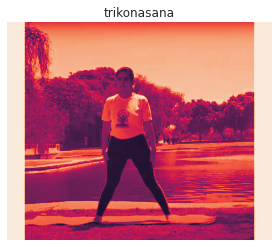

In [ ]:
for i in psycho:
  showFrame(i)

In [ ]:
df.Path[0]

In [ ]:
number = []
def count_frames(path):
  cap = cv2.VideoCapture(path)
  number.append((path.split('/')[-2], int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

In [ ]:
for x in df.Path:
  count_frames(x)

In [ ]:
frame_number = pd.DataFrame(number)

In [ ]:
frame_number

,0,1
0,brikshasana,93
1,brikshasana,44
2,brikshasana,90
3,brikshasana,186
4,brikshasana,54
5,brikshasana,227
6,trikonasana,575
7,trikonasana,114
8,trikonasana,86
9,trikonasana,447


In [ ]:
frame_number.to_csv('sagar_framecount.csv')

In [ ]:
frame_number.describe()

,1
count,21.000000
mean,216.238095
std,150.323952
min,44.000000
25%,95.000000
50%,177.000000
75%,318.000000
max,575.000000


In [ ]:
import seaborn as sns

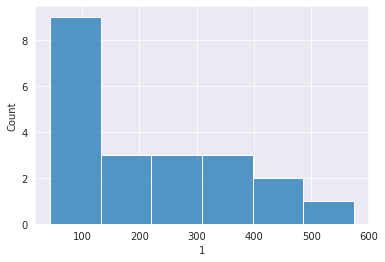

In [ ]:
sns.histplot(frame_number[1])